In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Homework #1

<b>3.)</b> Which of the following is a random variable?

a. The population mean

b. The population size, N

c. The sample size, n

d. The sample mean

e. The variance of the sample mean

f. The largest value in the sample

g. The population variance

h. The estimated variance of the sample mean

<h3>d, e, f, h</h3>

<b>5.)</b> How would you respond to a friend who asks you, “How can we say that the
sample mean is a random variable when it is just a number, like the population
mean? For example, in Example A of Section 7.3.2, a simple random sample of size 50 produced x  ̄ = 938.5; how can the number 938.5 be a random
variable?”

<h3>I would say that the sample mean is a random variable because everytime we take a different sample we are likely to get a different random answer</h3>

<b>7.)</b> Suppose that a simple random sample is used to estimate the proportion of families
in a certain area that are living below the poverty level. If this proportion is roughly
.15, what sample size is necessary so that the standard error of the estimate is .02?

<h3>The standar error is defined as

$$\sigma_{\bar X} = \frac {\sigma}{\sqrt n}$$

We are given that $p = 0.15$ and therefore $\sigma^2 = p(1-p) = 0.1275$. Now we simply solve for n:

$$n = \lceil \frac {0.1275}{0.02 ^ 2}\rceil = \lceil 318.75 \rceil = 319$$



<b>16.)</b> True or false?

a. The center of a 95% confidence interval for the population mean is a random
variable.

<b>True</b>

b. A 95% confidence interval for μ contains the sample mean with probability
.95.

<b>False</b>

c. A 95% confidence interval contains 95% of the population.

<b>False</b>

d. Out of one hundred 95% confidence intervals for μ, 95 will contain μ.

<b>True, at least on average</b>

<b>17.)</b> A 90% confidence interval for the average number of children per household
based on a simple random sample is found to be (.7, 2.1). Can we conclude that
90% of households have between .7 and 2.1 children?

<b>No. We can say that with 90% confidence the average number of children per household is between that range, but this has nothing to do with the conclusions reached.</b> 

<b>We can show this with a simple script:</b>

In [2]:
N = 100
x = array([0 if i%9 == 0 else 1 for i in range(N)])
mu = mean(x)
sd = std(x)
from scipy.stats import norm
print(mu - norm.ppf(0.95)*sd, mu + norm.ppf(0.95)*sd)

0.345485838586 1.41451416141


<b>Where we know that in fact more than 10% of the population has a value of zero. Therefore the conclusions reached above must be invalid</b>

<b>21.)</b> In order to halve the width of a 95% confidence interval for a mean, by what factor
should the sample size be increased? Ignore the finite population correction.

<b> We must quadruple the sample size </b>

<b>22.)</b> An investigator quantifies her uncertainty about the estimate of a population mean
by reporting $\bar{X} ± s_{\bar{ X}}$ . What size confidence interval is this?

In [3]:
a = norm.cdf(1.96)
print(a, 1 -(1 -a)*2)
a = norm.cdf(1)
print(a,  1 -(1 -a)*2)

0.975002104852 0.950004209704
0.841344746069 0.682689492137


<b>Looks like a 68% confidence interval</b>

<b>24.)</b> For a random sample of size n from a population of size N , consider the following
as an estimate of μ:

$$\bar{X_c} = \sum_{i=1}^n c_i X_i $$


where the $c_i$ are fixed numbers and $X_1$ , . . . , $X_n$ is the sample.

a. Find a condition on the $c_i$ such that the estimate is unbiased.

$$\mathbb{E}[\bar{X_c}] = \sum_{i=1}^n c_i \mathbb{E}[X_i] = \mu \sum_{i=1}^n c_i  $$

<b>Therefore, $\sum_{i=1}^n c_i = 1$ </b>

b. Show that the choice of $c_i$ that minimizes the variances of the estimate subject
to this condition is $c_i$ = 1/n, where i = 1, . . . , n.

$$Var(\bar{X_c}) = Var (\sum_{i=1}^n c_i X_i) = \sum_{i=1}^n Var(c_i X_i) = \sum_{i=1}^n c_i^2 Var(X_i)=  \sigma^2 \sum_{i=1}^n c_i^2 $$

<b>With the condition $c_i$ = 1/n, $Var(\bar{X_c}) = \sigma^2/n$. It is easy to verify (but I found difficult to prove) that any other choice will lead to a larger variance</b>




<b>35.)</b> A simple random sample of a population of size 2000 yields the following

25 values:

104
86
91
104
79

109
80
103
98
87

111
119
99
98
94

109
88
108
83
92

87
122
96
107
97


a. Calculate an unbiased estimate of the population mean.

In [22]:
x = """104 86 91 104 79
109 80 103 98 87
111 119 99 98 94
109 88 108 83 92
87 122 96 107 97"""
x = [int(i) for i in x.split()]
mean(x)

98.040000000000006

b. Calculate unbiased estimates of the population variance and Var($\bar{X}$ ).

In [5]:
s2 = sum((x-mean(x))**2)/(24)
s2

133.70666666666668

In [6]:
varX = (s2/25)*(1 - 25/2000)
varX

5.281413333333334

c. Give approximate 95% confidence intervals for the population mean and total.

In [24]:
print(mean(x) - 1.96*sqrt(varX), mean(x) + 1.96*sqrt(varX))
print(2000*(mean(x) - 1.96*sqrt(varX)), 2000*(mean(x) + 1.96*sqrt(varX)))

93.5356601525 102.544339847
187071.320305 205088.679695


<b>58.)</b> (Computer Exercise) Construct a population consisting of the integers from 1 to 100. Simulate the sampling distribution of the sample mean of a sample of size
12 by drawing 100 samples of size 12 and making a histogram of the results.

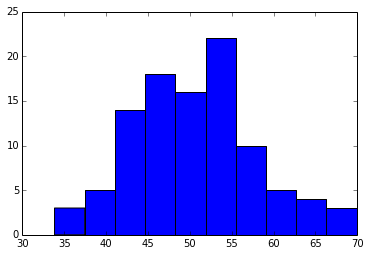

In [8]:
pop = [i+1 for i in range(100)]
means = []
for i in range(100):
    means.append(mean(np.random.choice(pop, 12, replace= False)))
hist(means);

<b>67.)</b> 

In these exercises, you will try to learn about the families of Cyberville by using
sampling.

a. Take a simple random sample of 500 families. Estimate the following population parameters, calculate the estimated standard errors of these estimates, and
form 95% confidence intervals:

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("Chapter 7/families.txt")
df.columns = ["TYPE", "PERSONS", "CHILDREN","INCOME","REGION","EDUCATION"]

In [11]:
samples = np.random.choice(len(df), 500, replace= False)
sample = df.ix[samples]

i. The proportion of female-headed families

In [12]:
female_head = sample["TYPE"] == 3
print("mean", mean(female_head))
print("estimated standard error", std(female_head)/sqrt(500))
print("confidence interval:", mean(female_head) - std(female_head)/sqrt(500),\
      mean(female_head) + std(female_head)/sqrt(500) )

mean 0.186
estimated standard error 0.0174013792557
confidence interval: 0.168598620744 0.203401379256


ii. The average number of children per family

In [64]:
avg_children = sample["CHILDREN"]
print("mean", mean(avg_children))
print("estimated standard error", std(avg_children)/sqrt(500))
print("confidence interval:", mean(avg_children) - std(avg_children)/sqrt(500),\
      mean(avg_children) + std(avg_children)/sqrt(500))

mean 0.95
estimated standard error 0.0541756402823
confidence interval: 0.895824359718 1.00417564028


iii. The proportion of heads of households who did not receive a high school
diploma

In [14]:
no_dip = sample["EDUCATION"]<39
print("mean", mean(no_dip))
print("estimated standard error", std(no_dip)/sqrt(500))
print("confidence interval:", mean(no_dip) - std(no_dip)/sqrt(500),\
      mean(no_dip) + std(no_dip)/sqrt(500) )

mean 0.238
estimated standard error 0.0190449993437
confidence interval: 0.218955000656 0.257044999344


iv. The average family income

In [15]:
income = sample["INCOME"]
print("mean", mean(income))
print("estimated standard error", std(income)/sqrt(500))
print("confidence interval:", mean(income) - std(income)/sqrt(500),\
      mean(income) + std(income)/sqrt(500) )

mean 43805.466
estimated standard error 1602.07608395
confidence interval: 42203.3899161 45407.5420839


Repeat the preceding parameters for five different simple random samples of
size 500 and compare the results.

In [16]:
for i in range(5):
    print("Sample", i+1)
    samples = np.random.choice(len(df), 500, replace= False)
    sample = df.ix[samples]
    female_head = sample["TYPE"] == 3
    print("Female head")
    print("mean", mean(female_head))
    print("estimated standard error", std(female_head)/sqrt(500))
    print("confidence interval:", mean(female_head) - std(female_head)/sqrt(500),\
          mean(female_head) + std(female_head)/sqrt(500) )
    avg_children = sample["CHILDREN"]
    print("average children")
    print("mean", mean(avg_children))
    print("estimated standard error", std(avg_children)/sqrt(500))
    print("confidence interval:", mean(avg_children) - std(avg_children)/sqrt(500),\
          mean(avg_children) + std(avg_children)/sqrt(500) )
    no_dip = sample["EDUCATION"]<39
    print("No diploma")
    print("mean", mean(no_dip))
    print("estimated standard error", std(no_dip)/sqrt(500))
    print("confidence interval:", mean(no_dip) - std(no_dip)/sqrt(500),\
          mean(no_dip) + std(no_dip)/sqrt(500) )
    income = sample["INCOME"]
    print("income")
    print("mean", mean(income))
    print("estimated standard error", std(income)/sqrt(500))
    print("confidence interval:", mean(income) - std(income)/sqrt(500),\
          mean(income) + std(income)/sqrt(500) )


Sample 1
Female head
mean 0.204
estimated standard error 0.0180213207063
confidence interval: 0.185978679294 0.222021320706
average children
mean 0.864
estimated standard error 0.0462494108071
confidence interval: 0.817750589193 0.910249410807
No diploma
mean 0.166
estimated standard error 0.016639951923
confidence interval: 0.149360048077 0.182639951923
income
mean 43057.878
estimated standard error 1409.8000232
confidence interval: 41648.0779768 44467.6780232
Sample 2
Female head
mean 0.198
estimated standard error 0.0178211110765
confidence interval: 0.180178888924 0.215821111076
average children
mean 0.992
estimated standard error 0.0496374052505
confidence interval: 0.94236259475 1.04163740525
No diploma
mean 0.204
estimated standard error 0.0180213207063
confidence interval: 0.185978679294 0.222021320706
income
mean 42571.03
estimated standard error 1579.39788875
confidence interval: 40991.6321113 44150.4278887
Sample 3
Female head
mean 0.168
estimated standard error 0.0167198086

<b>The results are roughly the same</b>

b. Take 100 samples of size 400.

In [17]:
all_samples = []
for i in range(100):
    samples = np.random.choice(len(df), 400, replace= False)
    sample = df.ix[samples]
    all_samples.append(sample)

i. For each sample, find the average family income.

In [45]:
income_avg = []
income_sd = []
for x in all_samples:
    income_avg.append(mean(x["INCOME"]))
    income_sd.append(std(x["INCOME"])/sqrt(400))

ii. Find the average and standard deviation of these 100 estimates and make
a histogram of the estimates.

41096.208525
1607.4203455


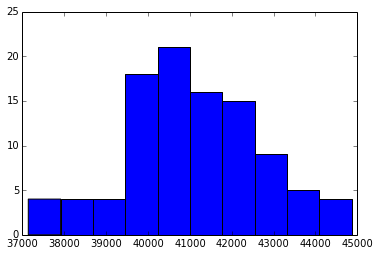

In [19]:
print(mean(income_avg))
print(std(income_avg))
hist(income_avg);

iii. Superimpose a plot of a normal density with that mean and standard devi-
ation of the histogram and comment on how well it appears to fit.

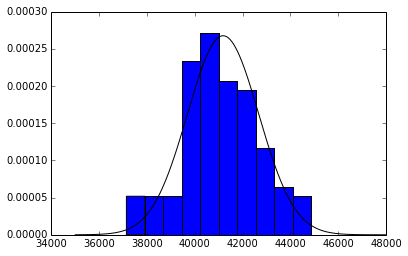

In [34]:
hist(income_avg, normed=True);
x = linspace(35000, 48000, 500)
plot(x,norm.pdf(x,41182, 1491), 'k');

<b>The fit looks approximately okay</b>

iv. Plot the empirical cumulative distribution function (see Section 10.2). On
this plot, superimpose the normal cumulative distribution function with
mean and standard deviation as earlier. Comment on the fit.

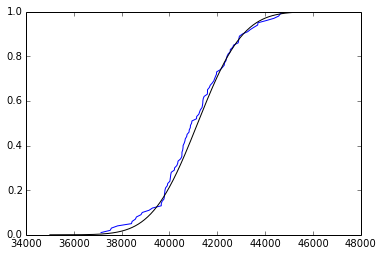

In [36]:
from statsmodels.tools.tools import ECDF
ecdf = ECDF(income_avg)
plot(ecdf.x, ecdf.y);
plot(x,norm.cdf(x,41182, 1491),'k');

<b> The fit looks almost perfect </b>

v. Another method for examining a normal approximation is via a normal
probability plot (Section 9.9). Make such a plot and comment on what it
shows about the approximation.

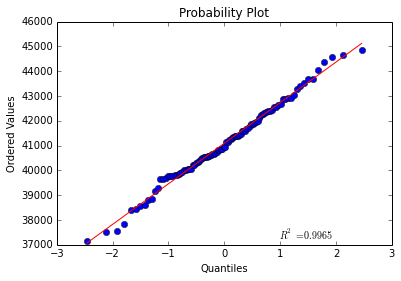

In [39]:
from scipy.stats import probplot
probplot(income_avg, dist="norm", plot=pylab);

<b>It looks pretty good, although there is some bumpiness in the tails</b>

vi. For each of the 100 samples, find a 95% confidence interval for the population average income. How many of those intervals actually contain the population target?

In [51]:
true_pop_target = mean(df['INCOME'])
fails = 0
for i in range(100):
    mu = income_avg[i]
    sd = income_sd[i]
    if(mu - 1.96*sd > true_pop_target):
        fails += 1
    if(mu + 1.96*sd < true_pop_target):
        fails += 1
print(fails)        

6


<b> Thus, for this sample, 94% of the intervals actually contain the population target </b>

vii. Take 100 samples of size 100. Compare the averages, standard deviations,
and histograms to those obtained for a sample of size 400 and explain how
the theory of simple random sampling relates to the comparisons.

41031.2142
3054.21923927


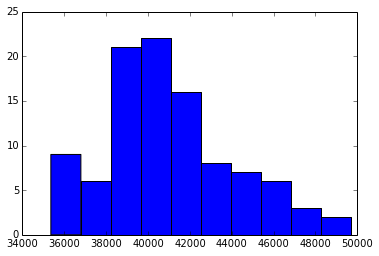

In [54]:
all_samples = []
for i in range(100):
    samples = np.random.choice(len(df), 100, replace= False)
    sample = df.ix[samples]
    all_samples.append(sample)
    
income_avg = []
income_sd = []
for x in all_samples:
    income_avg.append(mean(x["INCOME"]))
    income_sd.append(std(x["INCOME"])/sqrt(400)) 
print(mean(income_avg))
print(std(income_avg))
hist(income_avg);    

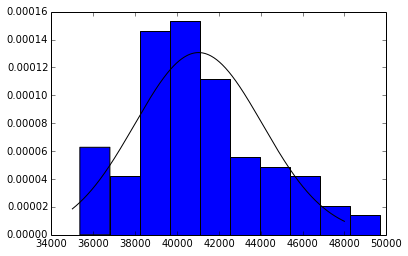

In [56]:
hist(income_avg, normed=True);
x = linspace(35000, 48000, 500)
plot(x,norm.pdf(x,41031, 3054), 'k');

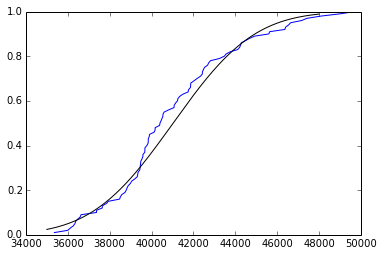

In [60]:
ecdf = ECDF(income_avg)
plot(ecdf.x, ecdf.y);
plot(x,norm.cdf(x,41031, 3054),'k');

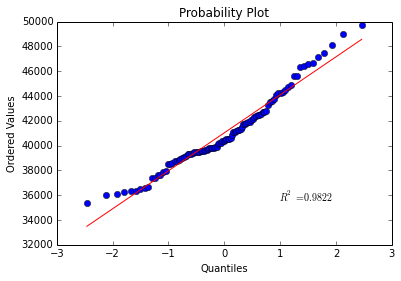

In [62]:
probplot(income_avg, dist="norm", plot=pylab);

<b>The first thing to note is that the sample size was decreased by a factor of 4. From what we learned, we expect that the standard deviation will be doubled, and this is essentially exactly what we see. The standard deviation went from 1607.4203455 to 3054.21923927.</b>

<b>We also see that the plots to check for normality are all much less smooth. This reinforces the notions that we have learned from the central limit theorem</b> 

c. For a simple random sample of 500, compare the incomes of the three family
types by comparing histograms and boxplots (see Chapter 10.6).

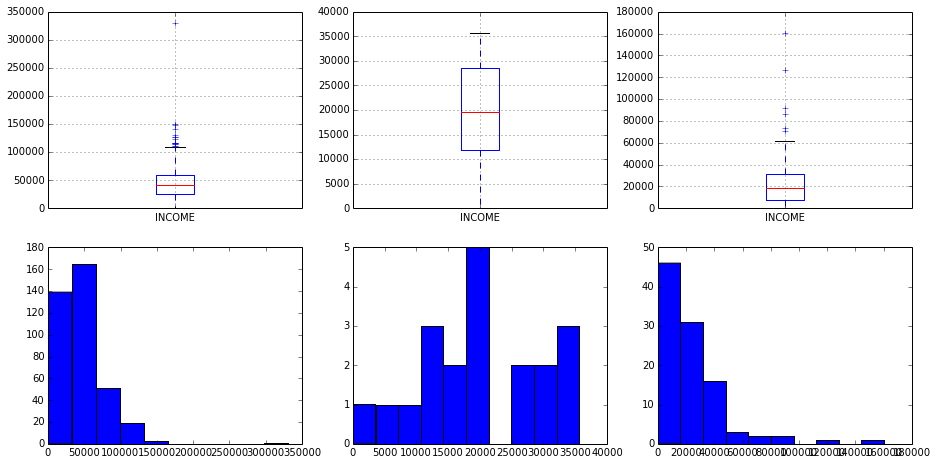

In [99]:
samples = np.random.choice(len(df), 500, replace= False)
sample = df.ix[samples]
#figsize(15,8)
subplot(231)
(sample[sample['TYPE'] == 1]).boxplot("INCOME");
subplot(232)
(sample[sample['TYPE'] == 2]).boxplot("INCOME");
subplot(233)
(sample[sample['TYPE'] == 3]).boxplot("INCOME");
subplot(234)
x = sample["INCOME"][sample['TYPE'] == 1]
hist(x.values);
subplot(235)
x = sample["INCOME"][sample['TYPE'] == 2]
hist(x.values);
subplot(236)
x = sample["INCOME"][sample['TYPE'] == 3]
hist(x.values);

<b>Both type 1 and type 3 appear to be heavily skewed to the right, with many outliers. Type 2 seems to be the most normal looking</b>

d. Take simple random samples of size 400 from each of the four regions.

i. Compare the incomes by region by making parallel boxplots.
ii. Does it appear that some regions have larger families than others?
iii. Are there differences in education level among the four regions?254
Chapter 7 Survey Sampling
e. Formulate a question of your choice and attempt to answer it with a simple
random sample of size 400.
f. Does stratification help in estimating the average family income? From a simple
random sample of size 400, estimate the average income and also the standard
error of your estimate. Form a 95% confidence interval. Next, allocate the 400
observations proportionally to the four regions and estimate the average income
from the stratified sample. Estimate the standard error and form a 95% confi-
dence interval. Compare your results to the results of the simple random sample.